In [21]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
import seaborn as sns

<h1>Abalone age prediction</h1>

<h2>1. Introduction</h2>

<h3>1.1 Dataset Description</h3>

Variable discription:
   - `Sex`: M (male), F (female), I (infant)
   - `Length`: longest shell measurement (in mm)
   - `Diameter`: measurement perpendicular to legnth (in mm)
   - `Height`: with meat in shell (in mm)
   - `Whole weight`: the whole abalone (in grams)
   - `Shucked weight`: weight of the meat (in grams)
   - `Viscera weight`: gut weight after bleeding (in grams)
   - `Shell weight`: after being dried (in grams)
   - `Rings`: + 1.5 gives the age in years (the value to predict)

<h3>1.2 Read dataset</h3>

In [26]:
n_read_rows = None
df = pd.read_csv('/home/davi/PycharmProjects/M-learn/mlfwk/datasets/abalone.csv', delimiter=',', nrows = n_read_rows)
df.dataframeName = 'pmsm_temperature_data.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4177 rows and 9 columns


In [27]:
df['age'] = df.Rings + 1.5
df.drop('Rings', axis=1, inplace=True)

In [28]:
df.Sex = df.Sex.replace({"M":1, "I":0, "F":-1})

In [29]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


<h3>1.3 Exploratory analisys</h3>

<h4>1.3.1 Statistical summary of features</h4>

In [30]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,-1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,-1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


<h4>1.3.2 % of missing values </h4>

In [14]:
df.isna().mean().to_frame(name='% of missing values') 

,% of missing values
Sex,0.0
Length,0.0
Diameter,0.0
Height,0.0
Whole weight,0.0
Shucked weight,0.0
Viscera weight,0.0
Shell weight,0.0
age,0.0


<h4>1.3.3 number of uniqe values for feature</h4>

In [15]:
df.nunique().to_frame("# of unique values")

,# of unique values
Sex,3
Length,134
Diameter,111
Height,51
Whole weight,2429
Shucked weight,1515
Viscera weight,880
Shell weight,926
age,28


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [17]:
numerical_features = ['Length', 'Diameter', 'Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
categorical_feature = "Sex"
features = numerical_features + [categorical_feature]
target = 'age'

In [19]:
df[target]

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

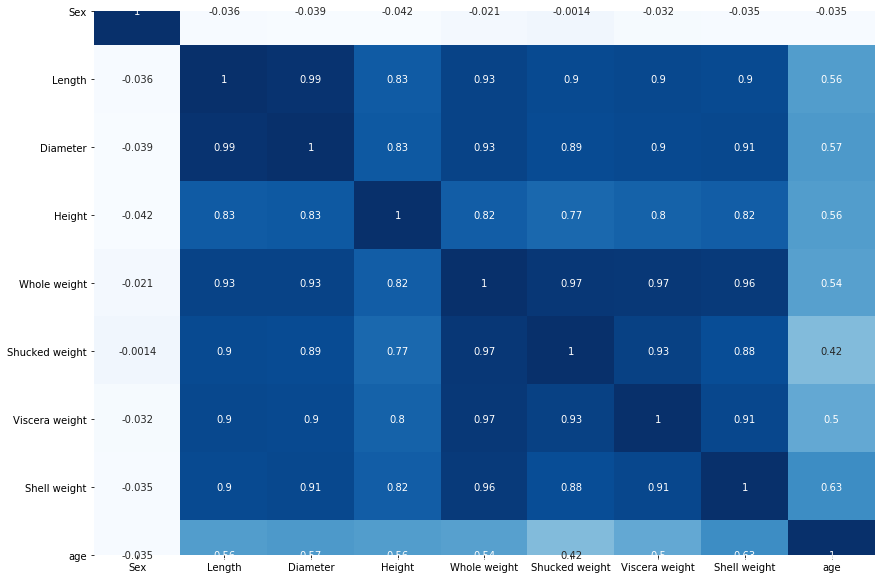

In [31]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(method='pearson'), annot=True, cbar=False, cmap='Blues')
plt.show()